PYOD library
https://github.com/yzhao062/pyod/tree/master/pyod

Data Set: 
http://odds.cs.stonybrook.edu/wine-dataset/

In [1]:
# import the libraries
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load the MATLAB file
mat = scipy.io.loadmat('wine.mat')

# Check the available keys in the mat object
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [3]:
# chech the data tha are stored in this file
# Load the data from the "cardio.mat" file
mat = scipy.io.loadmat('cardio.mat')

# Extract the data and labels arrays from the loaded data
X = mat['X']
y = mat['y']

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(X)

# Loop through the columns of the DataFrame and display the data
for col in df.columns:
    print(f"Column {col}:")
    print(df[col])
    print()


Column 0:
0       0.004912
1       0.110729
2       0.216546
3       0.004912
4      -0.100905
          ...   
1826   -0.418356
1827   -0.418356
1828   -0.418356
1829   -0.418356
1830   -0.418356
Name: 0, Length: 1831, dtype: float64

Column 1:
0       0.693191
1      -0.079903
2      -0.272445
3       0.727346
4       0.363595
          ...   
1826   -0.919988
1827   -0.919988
1828   -0.919988
1829   -0.919988
1830   -0.919988
Name: 1, Length: 1831, dtype: float64

Column 2:
0      -0.203640
1      -0.203640
2      -0.203640
3      -0.203640
4       1.321366
          ...   
1826   -0.161178
1827   -0.171055
1828   -0.164635
1829   -0.150934
1830   -0.203640
Name: 2, Length: 1831, dtype: float64

Column 3:
0       0.595322
1       1.268942
2       1.050988
3       1.212171
4       1.027120
          ...   
1826    0.829564
1827    0.796630
1828    0.952396
1829    0.695726
1830    1.173282
Name: 3, Length: 1831, dtype: float64

Column 4:
0       0.353190
1       0.396246
2       0.14

In [4]:
# convert the data into pandas dataframe
# Load the mat file
mat = scipy.io.loadmat('cardio.mat')

# Extract the X and y data
X = mat['X']
y = mat['y']

# Create a Pandas DataFrame for the data
df = pd.DataFrame(
    data=X, 
    columns=[f'feat_{i}' 
    for i in range(X.shape[1])]
    )

df['label'] = y.ravel()

# Print the first 5 rows of the DataFrame
print(df.head())


     feat_0    feat_1    feat_2    feat_3    feat_4    feat_5    feat_6  \
0  0.004912  0.693191 -0.203640  0.595322  0.353190 -0.061401 -0.278295   
1  0.110729 -0.079903 -0.203640  1.268942  0.396246 -0.061401 -0.278295   
2  0.216546 -0.272445 -0.203640  1.050988  0.148753 -0.061401 -0.278295   
3  0.004912  0.727346 -0.203640  1.212171 -0.683598 -0.061401 -0.278295   
4 -0.100905  0.363595  1.321366  1.027120  0.141359 -0.061401 -0.278295   

     feat_7    feat_8    feat_9  ...   feat_12   feat_13   feat_14   feat_15  \
0 -1.650444  0.759072 -0.420487  ... -0.798376  1.854728  0.622631  0.963083   
1 -1.710270  0.759072 -0.420487  ... -0.798376  1.854728  0.278625  0.963083   
2 -1.710270  1.106509 -0.420487  ... -1.332931  0.314688  2.342663 -0.488279   
3 -1.710270  1.106509 -0.420487  ... -1.332931  0.314688  1.654650 -0.488279   
4 -0.992364 -0.051613 -0.420487  ... -0.085638 -0.565334  0.278625 -0.488279   

    feat_16   feat_17   feat_18   feat_19   feat_20  label  
0  0.30

In [5]:
# import the PYOD from the github
!pip install pyod

     -------------------------------------- 150.0/150.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numba-0.56.4-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached llvmlite-0.39.1-cp310-cp310-win_amd64.whl (23.2 MB)
  Created wheel for pyod: filename=pyod-1.0.8-py3-none-any.whl size=184055 sha256=41f5872b7ce344e6699213e3298a825ecd7879ffd13121f7740a57730d5fe4b5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c8\14\e8\e3dbeaf9e3998260d2d999b7d12814f5d3ec98a4b9e982b6b1
Successfully built pyod


In [7]:
# import the models from PYOD libraries - test
from pyod.models import *

Number of outliers: 7


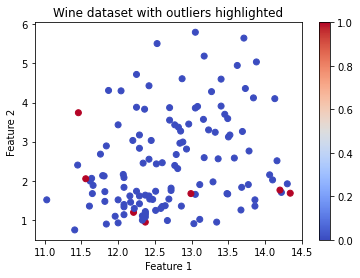

In [16]:
from pyod.models.iforest import IForest
import scipy.io
import numpy as np

# load the wine dataset
mat = scipy.io.loadmat('wine.mat')
X = mat['X']
y = mat['y'].ravel()

# create an instance of the IForest model
iforest = IForest(n_estimators=100, contamination=0.05) # n_est - numbers of trees = 100 default/contaminat rate = 5%

# fit the model to the data
iforest.fit(X)

# predict the outlier scores
y_pred = iforest.predict(X)

# print the number of detected outliers
print('Number of outliers:', np.sum(y_pred == 1))

# plot the data with the outliers highlighted
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Wine dataset with outliers highlighted')
plt.show()


### Implementation from github

In [18]:
!pip install combo

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for combo: filename=combo-0.1.3-py3-none-any.whl size=42884 sha256=c376b4aed83f9dea6c512e7f88f2460076dbf3c040f96dbd4a9bdd7575535c6d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\7a\48\ff\0d6e1017d8bf3d844d332736fbb268dca767162779f93ff50a
Successfully built combo


In [22]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))
# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores

from sklearn.metrics import roc_auc_score

In [23]:
# Define data file and read X and y
mat_file_list = ['wine.mat']

# Define nine outlier detection tools to be compared
random_state = np.random.RandomState(42)

df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc',
              'ABOD', 'CBLOF', 'FB', 'HBOS', 'IForest', 'KNN', 'LOF', 'MCD',
              'OCSVM', 'PCA']
roc_df = pd.DataFrame(columns=df_columns)
prn_df = pd.DataFrame(columns=df_columns)
time_df = pd.DataFrame(columns=df_columns)


for mat_file in mat_file_list:
    print("\n... Processing", mat_file, '...')
    mat = loadmat(os.path.join(mat_file))

    X = mat['X']
    y = mat['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=4)

    # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

    # 60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=random_state)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)

    classifiers = {'Angle-based Outlier Detector (ABOD)': ABOD(
        contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor': CBLOF(
            contamination=outliers_fraction, check_estimator=False,
            random_state=random_state),
        'Feature Bagging': FeatureBagging(contamination=outliers_fraction,
                                          random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(
            contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,
                                    random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Local Outlier Factor (LOF)': LOF(
            contamination=outliers_fraction),
        'Minimum Covariance Determinant (MCD)': MCD(
            contamination=outliers_fraction, random_state=random_state),
        'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
        'Principal Component Analysis (PCA)': PCA(
            contamination=outliers_fraction, random_state=random_state),
    }

    for clf_name, clf in classifiers.items():
        t0 = time()
        clf.fit(X_train_norm)
        test_scores = clf.decision_function(X_test_norm)
        t1 = time()
        duration = round(t1 - t0, ndigits=4)
        time_list.append(duration)

        roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
        prn = round(precision_n_scores(y_test, test_scores), ndigits=4)

        print('{clf_name} ROC:{roc}, precision @ rank n:{prn}, '
              'execution time: {duration}s'.format(
            clf_name=clf_name, roc=roc, prn=prn, duration=duration))

        roc_list.append(roc)
        prn_list.append(prn)

    temp_df = pd.DataFrame(time_list).transpose()
    temp_df.columns = df_columns
    time_df = pd.concat([time_df, temp_df], axis=0)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns
    prn_df = pd.concat([prn_df, temp_df], axis=0)


... Processing wine.mat ...
Angle-based Outlier Detector (ABOD) ROC:0.3605, precision @ rank n:0.0, execution time: 0.0247s
Cluster-based Local Outlier Factor ROC:0.0476, precision @ rank n:0.0, execution time: 1.6953s
Feature Bagging ROC:0.9388, precision @ rank n:0.3333, execution time: 0.0361s
Histogram-base Outlier Detection (HBOS) ROC:0.9252, precision @ rank n:0.3333, execution time: 1.9723s
Isolation Forest ROC:0.898, precision @ rank n:0.0, execution time: 0.2373s
K Nearest Neighbors (KNN) ROC:0.415, precision @ rank n:0.0, execution time: 0.005s
Local Outlier Factor (LOF) ROC:0.9456, precision @ rank n:0.3333, execution time: 0.0025s
Minimum Covariance Determinant (MCD) ROC:0.483, precision @ rank n:0.0, execution time: 0.0763s
One-class SVM (OCSVM) ROC:0.7211, precision @ rank n:0.0, execution time: 0.0016s
Principal Component Analysis (PCA) ROC:0.9184, precision @ rank n:0.0, execution time: 0.002s


In [24]:
print('Time complexity')
time_df

Time complexity


,Data,#Samples,# Dimensions,Outlier Perc,ABOD,CBLOF,FB,HBOS,IForest,KNN,LOF,MCD,OCSVM,PCA
0,wine,129,13,7.7519,0.0247,1.6953,0.0361,1.9723,0.2373,0.005,0.0025,0.0763,0.0016,0.002


In [26]:
print('ROC Performance')
roc_df

ROC Performance


,Data,#Samples,# Dimensions,Outlier Perc,ABOD,CBLOF,FB,HBOS,IForest,KNN,LOF,MCD,OCSVM,PCA
0,wine,129,13,7.7519,0.3605,0.0476,0.9388,0.9252,0.898,0.415,0.9456,0.483,0.7211,0.9184


In [27]:
print('Precision @ n Performance')
prn_df

Precision @ n Performance


,Data,#Samples,# Dimensions,Outlier Perc,ABOD,CBLOF,FB,HBOS,IForest,KNN,LOF,MCD,OCSVM,PCA
0,wine,129,13,7.7519,0.0,0.0,0.3333,0.3333,0.0,0.0,0.3333,0.0,0.0,0.0


### Default Code

In [ ]:
# Define data file and read X and y
mat_file_list = ['arrhythmia.mat',
                 'cardio.mat',
                 'glass.mat',
                 'ionosphere.mat',
                 'letter.mat',
                 'lympho.mat',
                 'mnist.mat',
                 'musk.mat',
                 'optdigits.mat',
                 'pendigits.mat',
                 'pima.mat',
                 'satellite.mat',
                 'satimage-2.mat',
                 'shuttle.mat',
                 'vertebral.mat',
                 'vowels.mat',
                 'wbc.mat']

# Define nine outlier detection tools to be compared
random_state = np.random.RandomState(42)

df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc',
              'ABOD', 'CBLOF', 'FB', 'HBOS', 'IForest', 'KNN', 'LOF', 'MCD',
              'OCSVM', 'PCA']
roc_df = pd.DataFrame(columns=df_columns)
prn_df = pd.DataFrame(columns=df_columns)
time_df = pd.DataFrame(columns=df_columns)


for mat_file in mat_file_list:
    print("\n... Processing", mat_file, '...')
    mat = loadmat(os.path.join('data', mat_file))

    X = mat['X']
    y = mat['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=4)

    # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

    # 60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=random_state)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)

    classifiers = {'Angle-based Outlier Detector (ABOD)': ABOD(
        contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor': CBLOF(
            contamination=outliers_fraction, check_estimator=False,
            random_state=random_state),
        'Feature Bagging': FeatureBagging(contamination=outliers_fraction,
                                          random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(
            contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,
                                    random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Local Outlier Factor (LOF)': LOF(
            contamination=outliers_fraction),
        'Minimum Covariance Determinant (MCD)': MCD(
            contamination=outliers_fraction, random_state=random_state),
        'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
        'Principal Component Analysis (PCA)': PCA(
            contamination=outliers_fraction, random_state=random_state),
    }

    for clf_name, clf in classifiers.items():
        t0 = time()
        clf.fit(X_train_norm)
        test_scores = clf.decision_function(X_test_norm)
        t1 = time()
        duration = round(t1 - t0, ndigits=4)
        time_list.append(duration)

        roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
        prn = round(precision_n_scores(y_test, test_scores), ndigits=4)

        print('{clf_name} ROC:{roc}, precision @ rank n:{prn}, '
              'execution time: {duration}s'.format(
            clf_name=clf_name, roc=roc, prn=prn, duration=duration))

        roc_list.append(roc)
        prn_list.append(prn)

    temp_df = pd.DataFrame(time_list).transpose()
    temp_df.columns = df_columns
    time_df = pd.concat([time_df, temp_df], axis=0)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns
    prn_df = pd.concat([prn_df, temp_df], axis=0)